# Pymaceuticals Inc.
---

### Analysis

- Among the range of drugs used in the study, Capomulin and Ramicane appear to be more effective in reducing the size of tumors in mice.
- The data presented in the bar graph indicates that Capomulin and Ramicane were the most widely tested treatments, with the highest number of mice.
- The average tumor volume increases as mouse weight increases; this is evidenced by the strong positive correlation coefficient of 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Hide warning messages in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

# Data pathway
mouse_metadata_pathway = "data/Mouse_metadata.csv"
study_results_pathway = "data/Study_results.csv"

# Read the csv files
mouse_metadata = pd.read_csv(mouse_metadata_pathway)
study_results = pd.read_csv(study_results_pathway)

# Merge the data into a single dataFrame
treatmentDF = pd.merge(mouse_metadata, study_results, how="right")
treatmentDF = treatmentDF[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", 
                               "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data
treatmentDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
number_mice = treatmentDF["Mouse ID"].value_counts()
mice_count = len(number_mice)
mice_count

249

In [3]:
# Checking the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint = treatmentDF.loc[treatmentDF.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice_timepoint

array(['g989'], dtype=object)

In [4]:
# Optional: Getting all the data for the duplicate mouse ID. 
duplicate_miceID = treatmentDF.loc[treatmentDF["Mouse ID"] == "g989", :]
duplicate_miceID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanTreatmentDF = treatmentDF[treatmentDF["Mouse ID"].isin(duplicate_mice_timepoint) == False]
cleanTreatmentDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanMiceNumber=cleanTreatmentDF["Mouse ID"].value_counts()
cleanMiceDF=len(cleanMiceNumber)
cleanMiceDF

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumorMean = cleanTreatmentDF.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumorMedian = cleanTreatmentDF.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumorVariance = cleanTreatmentDF.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumorStd = cleanTreatmentDF.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumorSem = cleanTreatmentDF.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
statsDF = pd.DataFrame({"Mean Tumor Volume": tumorMean, 
                                    "Median Tumor Volume":tumorMedian, 
                                    "Tumor Volume Variance":tumorVariance, 
                                    "Tumor Volume Std. Dev.": tumorStd, 
                                    "Tumor Volume Std. Err.": tumorSem})

statsDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

statsAgg =  cleanTreatmentDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
statsAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

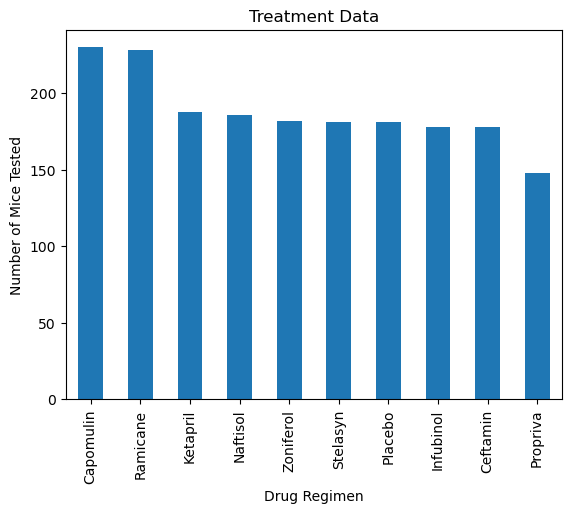

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Show the total number of time points for all mice tested for each drug regimen throughout the study.
miceTimepoints = cleanTreatmentDF["Drug Regimen"].value_counts()
pandaBarPlot = miceTimepoints.plot.bar(color= "tab:blue")

# Create labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Treatment Data")

plt.show()

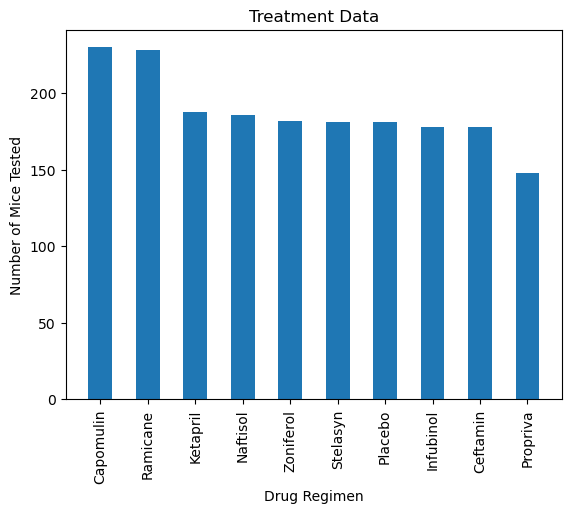

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Show the total number of time points for all mice tested for each drug regimen throughout the study.
x_axis = miceTimepoints.index.values
y_axis = miceTimepoints.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, width=0.5, color='tab:blue', align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Treatment Data")

plt.show()

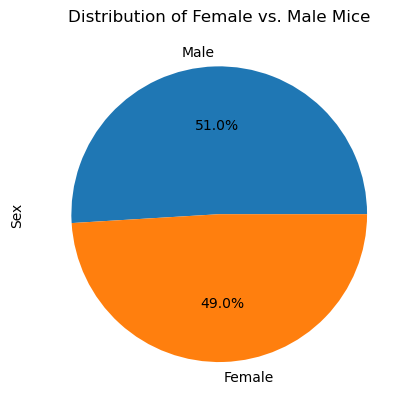

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderDist = cleanTreatmentDF["Sex"].value_counts()
genderDist.plot.pie(autopct= "%1.1f%%")
plt.title("Distribution of Female vs. Male Mice")
plt.show()

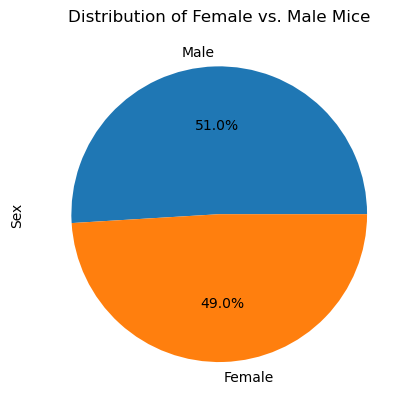

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.0, 51.0]
plot = genderDist.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Identifying potential outliers

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
mouseTumor = treatmentDF.groupby(["Mouse ID"]).max()
mouseTumorReset = mouseTumor.reset_index()

tumorMergeDF = mouseTumorReset[["Mouse ID","Timepoint"]].\
    merge(treatmentDF,on=["Mouse ID","Timepoint"],how="left")

def get_outliers(regimen):
    TreatmentReg = tumorMergeDF.loc[tumorMergeDF["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    
    quartiles = TreatmentReg.quantile([.25,.5,.75])
    firstQuart = quartiles[0.25]
    lastQuart = quartiles[0.75]
    quartRange = lastQuart - firstQuart
    lowerBound = firstQuart - (1.5 * quartRange)
    upperBound = lastQuart + (1.5 * quartRange)

    outliers = TreatmentReg.loc[(TreatmentReg < lowerBound) | (TreatmentReg > upperBound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return TreatmentReg
    
capOut = get_outliers("Capomulin")
RamOut = get_outliers("Ramicane")
infOut = get_outliers("Infubinol")
cefOut = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Performing final calculations

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugReg = treatmentDF[treatmentDF["Drug Regimen"].isin(treatmentList)]
drugReg

   
# Start by getting the last (greatest) timepoint for each mouse
timepointLast = drugReg.groupby(["Drug Regimen", "Mouse ID"]).agg(tumorSize=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

# Using .stack()/.unstack() to reshape dataframe for better visualization
timepointLast = timepointLast.stack(level=0).unstack(level=0)
    
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in treatmentList:
    quartiles = timepointLast[drug].quantile([.25,.5,.75]).round(2)
    firstQuart = quartiles[0.25].round(2)
    lastQuart = quartiles[0.75].round(2)
    quartRange = round(lastQuart-firstQuart,2)
    lowerBound = round(firstQuart - (1.5*quartRange),2)
    upperBound = round(lastQuart + (1.5*quartRange),2)


    if treatment == 0:
        print(f"--------------------------------------------------")
    print(f"The lower quartile of {drug} regimens is: {firstQuart}")
    print(f"The upper quartile of {drug} regimens is: {lastQuart}")
    print(f"The interquartile range of {drug} regimens is: {quartRange}")
    print(f"Values below {lowerBound} could be {drug} outliers.")
    print(f"Values above {upperBound} could be {drug} outliers.")
    print(f"-------------------------------------------------------")
    treatment+=1

--------------------------------------------------
The lower quartile of Capomulin regimens is: 32.38
The upper quartile of Capomulin regimens is: 40.16
The interquartile range of Capomulin regimens is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
-------------------------------------------------------
The lower quartile of Ramicane regimens is: 31.56
The upper quartile of Ramicane regimens is: 40.66
The interquartile range of Ramicane regimens is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
-------------------------------------------------------
The lower quartile of Infubinol regimens is: 54.05
The upper quartile of Infubinol regimens is: 65.53
The interquartile range of Infubinol regimens is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
-------------------------------------------------------
The lower quartile of Cefta

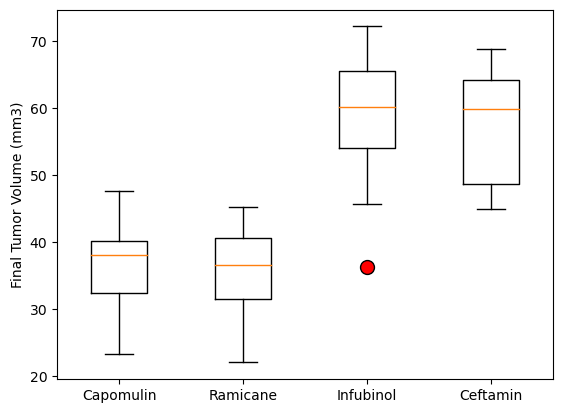

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outRed = dict(mfc = "red", ms =10)
plt.boxplot([capOut, RamOut, infOut, cefOut],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops= outRed)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

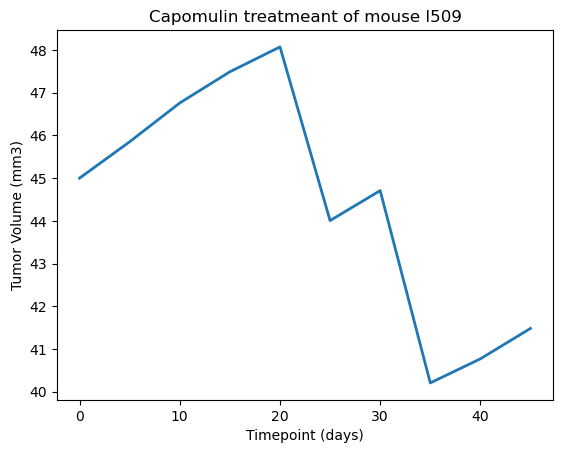

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Created a dataframe for the mouse from starter file using the .loc() function and a boolean to find l509 Mouse ID
CapDF = cleanTreatmentDF.loc[cleanTreatmentDF["Drug Regimen"] == "Capomulin",:]
linePlotDF = CapDF.loc[CapDF["Mouse ID"] == "l509",:]

# Created labels
x_axis = linePlotDF["Timepoint"]
tumsiz = linePlotDF["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

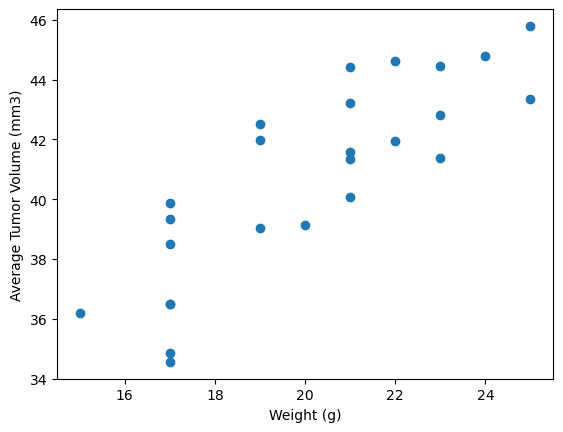

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgCapVol =CapDF.groupby(["Mouse ID"]).mean()
plt.scatter(avgCapVol["Weight (g)"],avgCapVol["Tumor Volume (mm3)"])

# Created labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


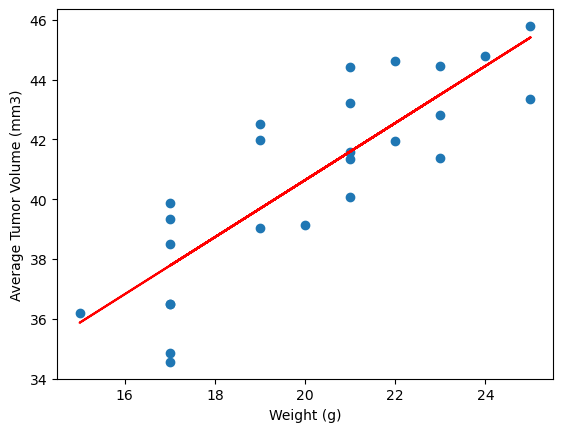

In [18]:
# Calculate the correlation coefficient and linear regression model  
# for mouse weight and average tumor volume for the Capomulin regimen
corrCoef = st.pearsonr(avgCapVol['Weight (g)'],avgCapVol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corrCoef[0],2)}")

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(avgCapVol["Weight (g)"],avgCapVol["Tumor Volume (mm3)"])
regValues=avgCapVol["Weight (g)"]* slope + intercept

plt.scatter(avgCapVol["Weight (g)"],avgCapVol["Tumor Volume (mm3)"])
plt.plot(avgCapVol["Weight (g)"], regValues, color="red")

# Created labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()